In [6]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

import os
os.environ["KMP_DUPLICATE_LIB_OK"]  =  "TRUE"

In [7]:
num_inputs =2
num_examples = 1000
true_w = [2,-3.4]
true_b = 4.2
features = torch.randn(num_examples,num_inputs,dtype=torch.float32)
labels = true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
labels += torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float32)
print(features[0],labels[0])

tensor([1.2636, 0.0125]) tensor(6.6907)


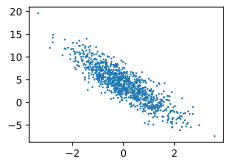

In [8]:
# import sys
# sys.path.append("..")
# from d2lzh_pytorch import *
    
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()
plt.scatter(features[:,1].numpy(),labels.numpy(),1)
        

In [9]:
# scratch 1
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples, batch_size):
        j = torch.LongTensor(indices[i:min(i+batch_size,num_examples)])
        yield features.index_select(0,j),labels.index_select(0,j)

In [10]:
batch_size = 10

for X, y in data_iter(batch_size,features,labels):
    print(X,y)
    break

tensor([[ 1.1804, -0.5052],
        [ 1.0112,  0.5170],
        [-0.2280,  0.8556],
        [-0.6709, -1.2397],
        [ 0.1207, -1.0410],
        [-0.6026,  1.2253],
        [-1.7206, -0.4796],
        [-0.2340,  1.0583],
        [ 1.2246,  1.0917],
        [ 0.2647,  3.5701]]) tensor([ 8.2865,  4.4445,  0.8263,  7.0565,  7.9551, -1.1718,  2.3966,  0.1376,
         2.9453, -7.4241])


In [11]:
# scratch 2
w = torch.tensor(np.random.normal(0, 0.01,(num_inputs,1)),dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [12]:
# scratch 3
def linreg(X, w, b):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    return torch.mm(X, w) + b

def squared_loss(y_hat, y):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    # 注意这里返回的是向量, 另外, pytorch里的MSELoss并没有除以 2
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr*param.grad/batch_size

In [13]:
# scrach_4

lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y).sum()
        l.backward()
        sgd([w,b], lr, batch_size)
        
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b),labels)
    print('epoch %d, loss %f'%(epoch+1,train_l.mean().item()))

epoch 1, loss 0.059296
epoch 2, loss 0.000318
epoch 3, loss 0.000050


In [14]:
print(true_w, '\n', w)
print(true_b, '\n',b)

[2, -3.4] 
 tensor([[ 1.9990],
        [-3.3993]], requires_grad=True)
4.2 
 tensor([4.1985], requires_grad=True)
